__Objectives:__

- What is Binomial distribution and in which situations do we use them?

- Parameters and properties of binomial distributions.

- Some other members of Binomial distributions

- What is normal distribution and in which situations do we use them?

- Parameters and properties of normal distributions.

- What is the difference between sample and population? Discussion of parameter vs sample statistics.

- Definition of points estimate and important point estimates used in statistics.

- Sampling distribution of mean - CLT


# Important Discrete and Continuous 

## Normal Distributions

<img src="img/bell_shape.png" width="650">
The most important probability distribution for describing a continuous random variable is the normal probability distribution. The normal distribution has been used in a wide variety of practical applications in which the random variables are heights and weights of people, test scores, scientific measurements, amounts of rainfall, and other similar values.


<img src="img/normal_curve.png" width="650">


Consider the following example: IQ-scores:


<img src="img/iq_score.png" width="650">


### Important Observations on Normal Distributions

- The entire family of normal distributions is differentiated by two parameters: the mean $\mu$ and the standard deviation $\sigma$.

- The highest point on the normal curve is at the mean, which is also the median and mode of the distribution.

- The mean of the distribution can be any numerical value.

- The normal distribution is symmetric around the mean.

- Empirical Law: 

    - Around 68% of the values are within $\pm$ one standard deviation away from its mean.
    
    - Around 95% of the values are 2 std away from the mean.
    
- Standard deviation determines the 'steepness' of the distribution.

### Calculating Probabilities with Normal Distributions

As any continuous variable, if we want to find the probabilities coming from a normally distributed random variable Z, we should calculate the areas under the curve. Let's discuss the following cases:

In this example, we have a normal distribution with mean = 0 and std= 1. Here the area gives the probability that the random variable Z is between -0.5 and 1.25.

<img src="img/pdf_normal.png" width="650">



- In this case, the shaded area gives the probability of Z values that are smaller than 1.
<img src="img/cdf_normal.png" width="650">

- Using similar method we can also easily find the probability of obtaining a z-value of at least 1.58. In notation $P(Z \geq 1.58) \simeq P(z \geq 1.58)$

<img src="img/normal_tail.png" width="650">



### Python and Normal Distributions

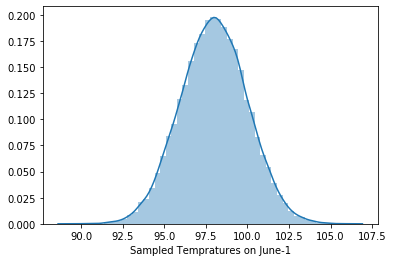

In [1]:
## we could use scipy to generate similar sample
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


nyc_temp2 = stats.norm.rvs(loc=98, scale=2, size = 365 * 100, random_state = 1905)
sns.distplot(nyc_temp2, axlabel = 'Sampled Tempratures on June-1' );

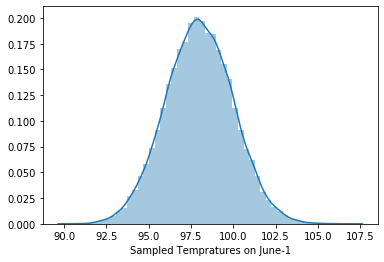

In [16]:
## let's create a normal distribution using stats
nyc_temp2 = stats.norm.rvs(loc=98, scale=2, size = 365 * 100, random_state = 8754)
sns.distplot(nyc_temp2, axlabel = 'Sampled Tempratures on June-1' );


#%load -r 1-8 supplement.py

In [22]:
## use cdf and pdf methods with stats.norm

mean_10_std_2 = stats.norm.pdf(loc = 10, scale = 2, x =10)

mean_10_std_2

#%load -r 10-18 supplement.py

0.19947114020071635

### Work on your own

[First let's check the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)

- Now create a normally distributed object with mean= 0 and standard deviation=1.

Q1: Find the value z for which $P(Z\leq z)$ = 0.5 

z = 0 

Q1a: What is the density of this point?

Q2: Solve the same problem with $P(Z \leq z) = 0.159$.

Q2a: Solve the same problem with $P(Z \geq z) = 0.8$.

Q2b: What is the density of this point?

- Now create another normally distributed random variable with mean =10 and std =2. 

Q1: Find the value z for which $P(Z\leq z)$ = 0.5 

Q2: Solve the same problem with $P(Z \leq z) = 0.159$.

__Challenge__: Could you solve the second problem without using code and just using the information from the first part?

In [26]:
standard_normal = stats.norm(loc = 0, scale = 1)
standard_normal.ppf(0.8)
iais

0.8416212335729143

## Binomial Distribution

__Binomial Experiments__

1. The experiment consists of a sequence of n identical trials.
2. Two outcomes are possible on each trial. We refer to one outcome as a success and the other outcome as a failure.
3. The probability of a success, denoted by p, does not change from trial to trial.
Consequently, the probability of a failure, denoted by q = 1-p, does not change from trial to trial.
4. The trials are independent.


__Comments:__

- What if we have more than two outcomes for each trials?

- Success/Failure is just a convention. In practice, these can correspond to Head-Tail, Ham-Spam, Positive-Negative, Accepted-Rejected, etc.

### Definition of Binomial Distribution

For any Binomial Experiment we can define a random variable X as the number of successes. The probability distributions of such random variable is called __Binomial Distribution__.

### Use python to work with Binomial Distributions

[Let's first check the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)

In [41]:
## create a binomial dist
## with n=10 and p =0.3

binom = stats.binom(n = 10, p = .3)
#%load -r 21-23 supplement.py

### Challenge:
Let us consider the purchase decisions of the next three customers who enter the Martin Clothing Store. On the basis of past experience, the store manager estimates the probability that any one customer will make a purchase is .30. What is the probability that four of the next 10 customers will make a purchase?

- Also for this case find the expected value and variance.


In [43]:
binom.cdf(4)

0.8497316674



# Sampling Distributions

## Population vs Sample

__population__ A population is the set of all elements of interest in a study.

__sample__ A sample is a subset of the population.

### Scenario

The mayor's office has hired Flatiron Data Science Immersive students to determine a way to fix traffic congestion. A good starting point is to determine out what proportion of the population of DC owns a car.

In order for us to make any determinations about a population, we must first get information about it.

Because it's impractical to ever usually get data about *everyone* in a population, we must take a sample.

Our sample should be:

* Randomly selected- every item should have an *equal* chance of being selected
* Representative of our population

![pop](./img/sample_pop.png)


**Random sampling is not easy to do, let's look at an example:**

Imagine you are trying to determine what proportion of DC metro area people own a car

* Stand outside of Flatiron at 12 pm and ask random people until *n* responses


* Go to a randomly assigned street corner and at a random time and ask *n* people if they own a car


__Objective of Sampling__

When we gather a sample, we are trying to minimize the bias of our sample while also minimizing our cost.


## Point Estimates

![imgsample](./img/sample_stats.png)

### Working with data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/201904-capitalbikeshare-tripdata.csv')
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,313,2019-04-01 00:03:03,2019-04-01 00:08:16,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W24063,Member
1,453,2019-04-01 00:07:37,2019-04-01 00:15:10,31119,14th & Belmont St NW,31298,15th & M St NW,W22080,Member
2,333,2019-04-01 00:09:31,2019-04-01 00:15:05,31203,14th & Rhode Island Ave NW,31519,1st & O St NW,W00276,Member
3,568,2019-04-01 00:10:20,2019-04-01 00:19:49,31202,14th & R St NW,31103,16th & Harvard St NW,W21582,Member
4,1609,2019-04-01 00:10:38,2019-04-01 00:37:28,31517,Union Market,31655,New Jersey Ave & F St NW,75558,Member


In [42]:
trip_durations = df['Duration']/60
trip_durations = trip_durations[trip_durations < 2*60]

In [3]:
## in pandas there are built-in methods 
## for mean, variance and mode

#%load -r 25-29 supplement.py

In [4]:
## now plot the histogram of 
## trip_durations

#%load -r 32-35

In [78]:
## take a sample from this group
sample_means = [trip_durations.sample(n = 30, replace=True).mean() for i in range(1000)]

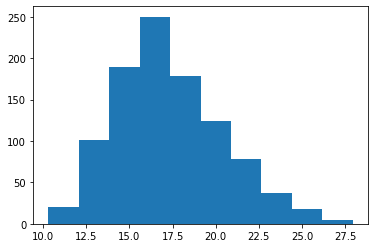

In [79]:
plt.hist(sample_means)

plt.show()

# Central Limit Theorem

The Central Limit Theorem states: 
>When you add **a large number** of independent random variables, irrespective of the original distribution of these variables, **their sampling mean distribution tends towards a normal distribution** with mean equals to the mean of the originial distribution and the standard deviation equals to $\frac{\sigma}{\sqrt{n}}$.



![probgif](./img/probability-basics.gif)


The standard error of the mean is the standard deviation of the sampling distribution.
The issue is that a sample is not an exact replica of the population. We need to account for the fact that in order to make our estimate of the $\mu$ value possible. Let's break it down:

## Standard Error

$$\sigma _{x} = \frac{\sigma }{\sqrt{n}}$$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population


**What if we do not know the population sigma?**<br>
If we do not know the population standard deviation, we can approximate for it by used the sample standard deviation.

$\sigma _{x} ≈ \frac{s}{\sqrt{n}}$$

* s = sample standard deviation

**Sample size impact on standard error of mean**<br>

Q: How should sample size influence standard error of the mean?


![error](./img/diminishing_error.png)
Important implication: The Standard Error of the mean remains the same as long as the population standard deviation is known and sample size remains the same.
